### Classification with CIFAR-10 Dataset and VGG-style network
This script sets up a VGG-style network to classify two classes from the CIFAR-10 dataset.

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Input, Conv2D, Dense, Flatten, MaxPooling2D
from keras.optimizers import SGD
from matplotlib import pyplot as plt
import numpy as np
from utils import *

/usr/local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = get_cifar10_data(vectorize=False)

Build the model.

In [3]:
model = Sequential()
model.add(Conv2D(64,3,padding='same',activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(64,3,padding='same',activation='relu'))
model.add(Conv2D(64,3,padding='same',activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,3,padding='same',activation='relu'))
model.add(Conv2D(128,3,padding='same',activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,3,padding='same',activation='relu'))
model.add(Flatten())
model.add(Dense(200,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
__________

Set up the model to optimize the binary crossentropy loss using stochastic gradient descent.

In [4]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Optimize the model over the training data.

In [5]:
history = model.fit(x_train, y_train,
                    batch_size=100,
                    epochs=50,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 10000 samples, validate on 2000 samples
Epoch 1/50
10000/10000 [==============================] - 6s 645us/step - loss: 0.3646 - acc: 0.8358 - val_loss: 0.1937 - val_acc: 0.9235
Epoch 2/50
10000/10000 [==============================] - 5s 456us/step - loss: 0.1691 - acc: 0.9335 - val_loss: 0.1345 - val_acc: 0.9485
Epoch 3/50
10000/10000 [==============================] - 5s 457us/step - loss: 0.1135 - acc: 0.9572 - val_loss: 0.1350 - val_acc: 0.9455
Epoch 4/50
10000/10000 [==============================] - 5s 459us/step - loss: 0.0806 - acc: 0.9686 - val_loss: 0.1183 - val_acc: 0.9545
Epoch 5/50
10000/10000 [==============================] - 5s 456us/step - loss: 0.0570 - acc: 0.9773 - val_loss: 0.1355 - val_acc: 0.9610
Epoch 6/50
10000/10000 [==============================] - 5s 456us/step - loss: 0.0408 - acc: 0.9841 - val_loss: 0.1037 - val_acc: 0.9635
Epoch 7/50
10000/10000 [==============================] - 5s 451us/step - loss: 0.0277 - acc: 0.9893 - val_loss: 0.1097 - v

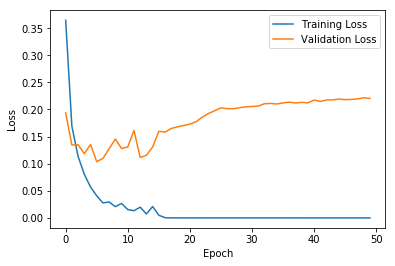

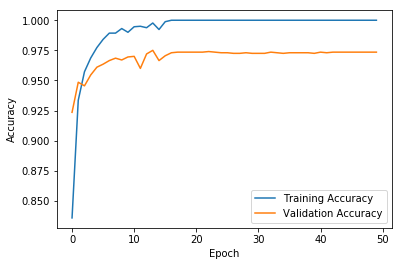

In [6]:
plot_history(history)

In [7]:
evaluate_test_accuracy(model,x_test,y_test)

2000/2000 [==============================] - 0s 191us/step
Test accuracy: 97.35%
